# Titanic Survival Prediction

The goal of this project is to use machine learning to determine which passengers survive the Titanic shipwreck

In [5]:
# import libraries
import pandas as pd

# read data
data = pd.read_csv("titanic_data/train.csv")

# check the dimension of the table
print("The dimension of the table is: ", data.shape)

# show first 5 rows of the table
print(data.head())

The dimension of the table is:  (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0     

There are 12 columns for this dataset. Here is a list of the name and defining details.

+ PassengerID
+ Survived - Survival (0 = No, 1 = Yes)
+ Pclass - Ticket Class (1 = 1st, 2 = 2nd, 3 = 3rd)
+ Name
+ Sex - Sex
+ Age - Age in years
+ SibSp - # of siblings/ spouses aboard the Titanic
+ Parch - # of parents / children aboard the Titanic
+ Ticket - Ticket number
+ Fare - Passenger fare
+ Cabin - Cabin number
+ Embarked - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### Current Questions about the data

1. What do the variables look like?
2. What value type are the variables?
3. Are the numerical variables correlated?
4. Are the distributions of numerical variables the same or different among survived and not survived?
5. Is the survival rate different for different values?
6. Are there different survival rates in different categories?

### What do the variables Look Like?

In [6]:
# Display details on numeric values
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The above displays some details regarding the numerical values in the data.

One thing to take note is that there are missing values in age. The total count is 891, but age only ha 714.

Now looking at details for non-numeric values

In [9]:
# Display details on non-numeric values
data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hart, Mr. Benjamin",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


So for cabin, there are only 204 counted and 147 unique. This means some people are sharing cabines and there are missing values for cabin assignments. Looking at the previous results it is confirmed that there are missing values.  So how many total cabins were available on the Titanic?

Tickets have 681 unique values, why is that.

Embark appears to be missing some values as well.

### Visualizations of the Data

"PassengerID", "Survived" and "Pclass" are categorical data so they will not be used to plot the histogram.

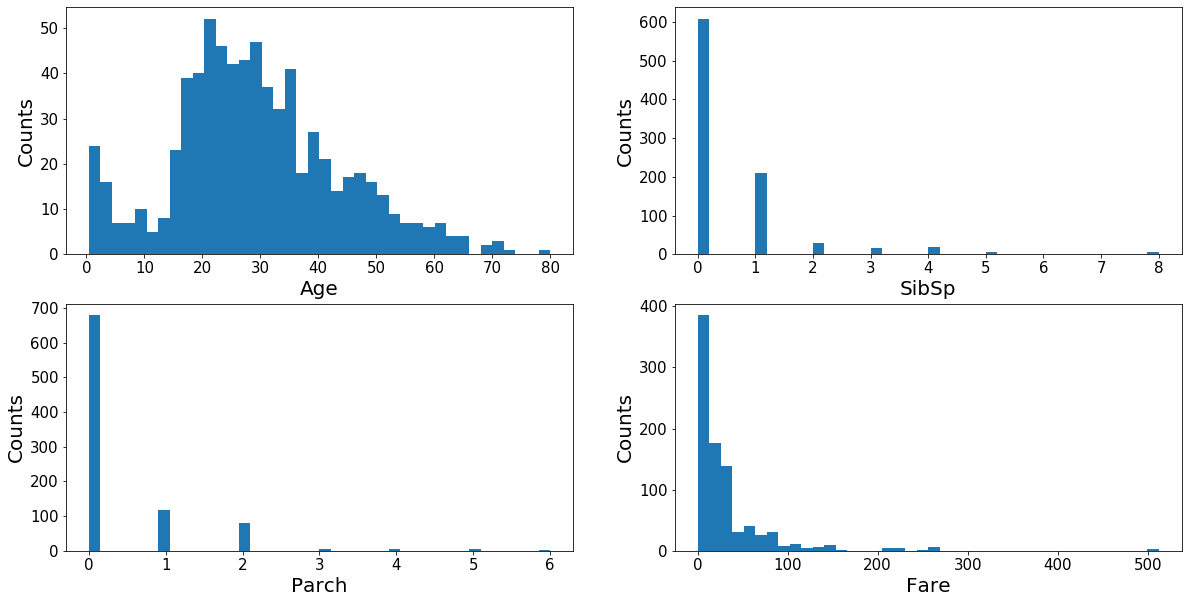

In [12]:
# import visualization packages
import matplotlib.pyplot as plt

# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)

The data values appear to be in the correct range. A majority of the passengers are between he ages of 20 and 40 years old. They don't have siblings or other children with them and a majority of the tickets were purchased below $50 with very few purchased for over $500.

Next is a barplot of categorical data. "Ticket" and "Cabin" will be omitted for having too many levels.

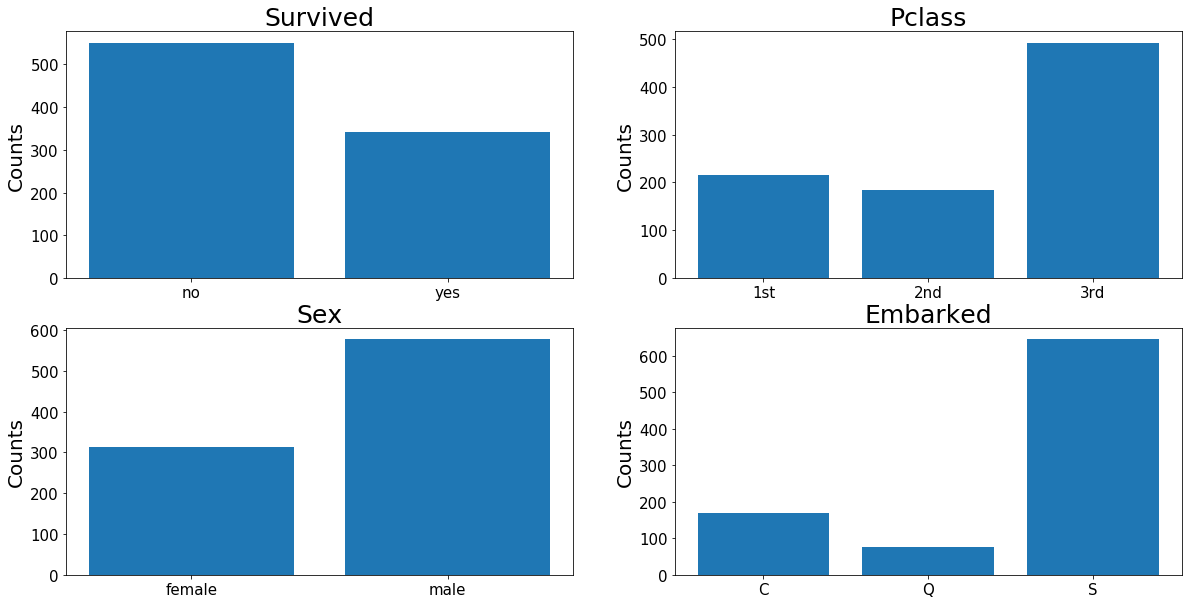

In [15]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visualizer
X_Survived = data.replace({'Survived': {1:'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Survived']
Y_Survived = data.replace({'Survived': {1:'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[0, 0].bar(X_Survived, Y_Survived)
axes[0, 0].set_title('Survived', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visualizer
X_Pclass = data.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Pclass']
Y_Pclass = data.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[0, 1].bar(X_Pclass, Y_Pclass)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Sex = data.groupby('Sex').size().reset_index(name='Counts')['Sex']
Y_Sex = data.groupby('Sex').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[1, 0].bar(X_Sex, Y_Sex)
axes[1, 0].set_title('Sex', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# make the data read to fee into the visualizer
X_Embarked = data.groupby('Embarked').size().reset_index(name = 'Counts')['Embarked']
Y_Embarked = data.groupby('Embarked').size().reset_index(name = 'Counts')['Counts']

# make the bar plot
axes[1, 1].bar(X_Embarked, Y_Embarked)
axes[1, 1].set_title('Embarked', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)

Next we will determine if numerical variables are correlated, using the Pearson Ranking visualization.

C:\Users\kdenn\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


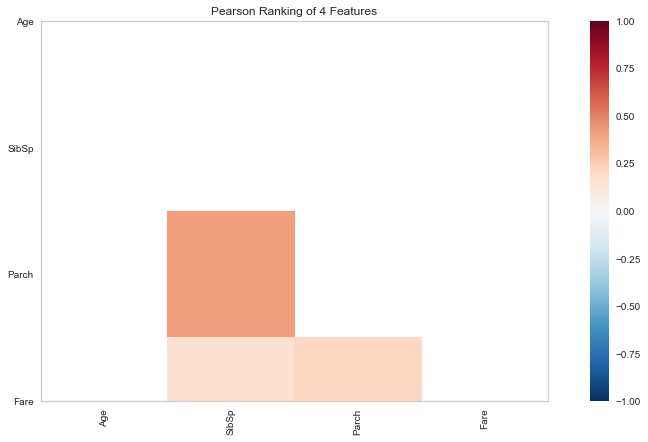

In [21]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,7)

# import the package for visualization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = data[num_features].as_matrix()

# instatiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')

# Fit the data to the visualizer
visualizer.fit(X)

# Transform the data
visualizer.transform(X)

# Draw/show/poof the data
visualizer.poof()

Are the distribution of numerical variables, the same or different among survived and not survived?

This will compare the distribution of numerical variables between passengers that survived and thos that did not survive.

C:\Users\kdenn\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\kdenn\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


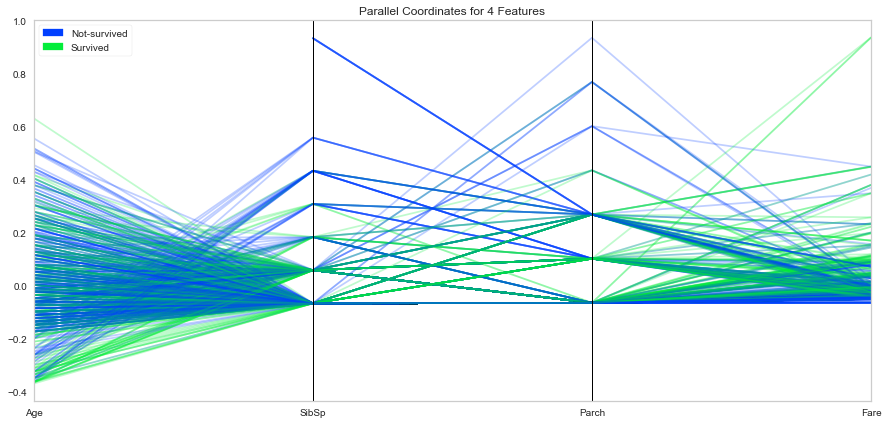

In [25]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates

# Specify the features of interest and the classes of the target
classes = ['Not-survived', 'Survived']
num_features = ['Age', 'SibSp', 'Parch', 'Fare']

# copy data to a new dataframe
data_norm = data.copy()

# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (data[feature] - data[feature].mean(skipna=True)) / (data[feature].max(skipna=True) - data[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].as_matrix()
y = data.Survived.as_matrix()

# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)

# Fit the data to the visualizer
visualizer.fit(X, y)

# Transform the data
visualizer.transform(X)

# Draw/show/poof the data
visualizer.poof()